In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

# 작업형 1 
### 1번
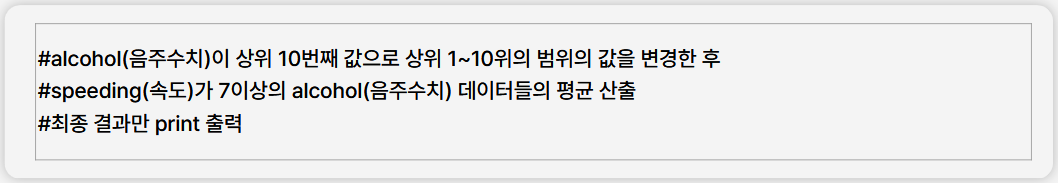

In [80]:
sns.get_dataset_names
df = sns.load_dataset('car_crashes')
print(f'>>> Data Frame Shape: {df.shape}\n')
df.info()

>>> Data Frame Shape: (51, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total           51 non-null     float64
 1   speeding        51 non-null     float64
 2   alcohol         51 non-null     float64
 3   not_distracted  51 non-null     float64
 4   no_previous     51 non-null     float64
 5   ins_premium     51 non-null     float64
 6   ins_losses      51 non-null     float64
 7   abbrev          51 non-null     object 
dtypes: float64(7), object(1)
memory usage: 3.3+ KB


In [16]:
data = df.sort_values(by=df.columns[2], ascending=False)
data.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
34,23.9,5.497,10.038,23.661,20.554,688.75,109.72,ND
40,23.9,9.082,9.799,22.944,19.359,858.97,116.29,SC
26,21.4,8.346,9.416,17.976,18.190,816.21,85.15,MT
43,19.4,7.760,7.372,17.654,16.878,1004.75,156.83,TX
11,17.5,9.450,7.175,14.350,15.225,861.18,120.92,HI


In [17]:
ten_val = data.iloc[9,2]
data.iloc[:10,2] = ten_val
data.head(11)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
34,23.9,5.497,5.771,23.661,20.554,688.75,109.72,ND
40,23.9,9.082,5.771,22.944,19.359,858.97,116.29,SC
26,21.4,8.346,5.771,17.976,18.190,816.21,85.15,MT
43,19.4,7.760,5.771,17.654,16.878,1004.75,156.83,TX
11,17.5,9.450,5.771,14.350,15.225,861.18,120.92,HI
18,20.5,7.175,5.771,14.965,20.090,1281.55,194.78,LA
48,23.8,8.092,5.771,23.086,20.706,992.61,152.56,WV
41,19.4,6.014,5.771,19.012,16.684,669.31,96.87,SD
3,22.4,4.032,5.771,21.056,21.280,827.34,142.39,AR
36,19.9,6.368,5.771,18.308,18.706,881.51,178.86,OK


In [23]:
result = data[(data['speeding']>=7)]
print(result['alcohol'].mean())

5.600099999999999


-----

### 2번
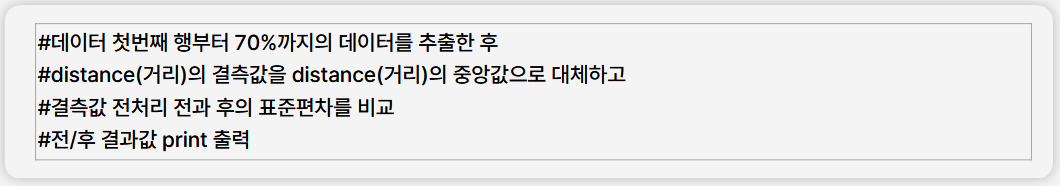

In [54]:
df = sns.load_dataset('planets')
print(f'>>> Data Frame Shape: {df.shape}\n')
df.info()

>>> Data Frame Shape: (1035, 6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [58]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [60]:
top_70 = int(len(df)*0.7)
df = df.iloc[:top_70,:]    # df_selected = df[:top_70]
df_selected = df.copy()
df_selected.head(top_70)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
719,Transit,1,131.458000,NaN,1645.00,2011
720,Transit,2,13.839890,NaN,470.00,2012
721,Transit,2,16.238550,NaN,470.00,2012
722,Transit,3,13.367308,NaN,66.00,2013


In [61]:
med_val = df_selected['distance'].median()
df_selected['distance'] = df_selected['distance'].fillna(med_val)
df_selected.isnull().sum()

method              0
number              0
orbital_period     20
mass              216
distance            0
year                0
dtype: int64

In [65]:
result1 = df['distance'].std()  # result1 = np.std(df['distance'], ddof=1)
result2 = df_selected['distance'].std()  # result2 = np.std(df_selected['distance'], ddof=1)
print(f'Before: {result1} --> After: {result2}')

Before: 275.2191532793011 --> After: 267.2360034486679


##### pandas와 numpy의 표준 편차 계산의 차이
- pandas.DataFrame.std(): 기본적으로 ddof=1로 설정되어 있어 표본 표준 편차를 계산합니다.
- numpy.std(): 기본적으로 ddof=0로 설정되어 있어 모집단 표준 편차를 계산합니다.

##### 결측치 처리 여부의 차이
- 결측치를 처리하지 않은 경우, pandas의 std() 함수는 NaN 값을 무시하고 계산하지만, numpy의 std() 함수는 기본적으로 NaN 값을 무시하지 않기 때문에 NaN이 있는 경우 결과가 NaN이 됩니다. 

-----
### 3번
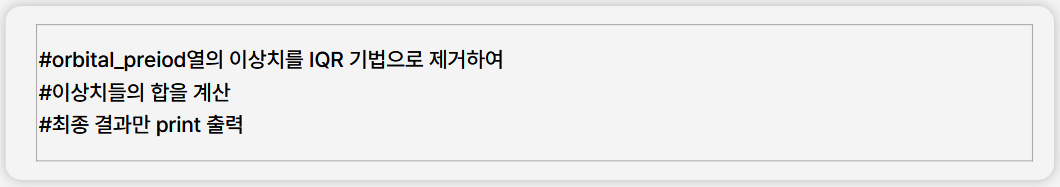

In [69]:
df = sns.load_dataset('planets')
print(f'>>> Data Frame Shape: {df.shape}\n')
df.info()

>>> Data Frame Shape: (1035, 6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [71]:
Q25 = df['orbital_period'].quantile(0.25)
Q75 = df['orbital_period'].quantile(0.75)
IQR = Q75 - Q25

In [72]:
min, max = Q25-IQR*1.5, Q75+IQR*1.5

##### Python 논리연산자: 
- OR(|)
- AND(&)

In [78]:
df_outlier = df[(df['orbital_period']<=min) | (df['orbital_period']>=max)]  # 괄호 위치 확인
df_outlier.head()

,method,number,orbital_period,mass,distance,year
6,Radial Velocity,1,1773.4,4.64,18.15,2002
14,Radial Velocity,3,2391.0,0.54,14.08,2001
15,Radial Velocity,3,14002.0,1.64,14.08,2009
19,Radial Velocity,5,4909.0,3.53,12.53,2002
32,Eclipse Timing Variations,1,10220.0,6.05,NaN,2009


In [79]:
print(df_outlier['orbital_period'].sum())

1818772.582
